Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Manuela Bastidas Olivares y Nicolás Guarín-Zapata 2024.

# Regresión lineal en PyTorch

Basado en el siguiente tutorial

https://machinelearningmastery.com/training-a-linear-regression-model-in-pytorch/

In [1]:
# Esto permite tener gráficos interactivos en
# el caso de correrse en Google Colab
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [4]:
if 'google.colab' in str(get_ipython()):
    style = "https://raw.githubusercontent.com/nicoguaro/pinns_mapi-3/main/notebooks/clean.mplstyle"
else:
    style = "./clean.mplstyle"
plt.style.use(style)

## Generación de datos

Creemos una función entre -10 y 10 con pendiente 3

In [5]:
npts = 1000
X = torch.linspace(-10, 10, npts).view(-1, 1)
fun = 3 * X

Agreguemos algo de ruido a los datos

In [6]:
Y = fun + 3 * torch.randn(X.size())

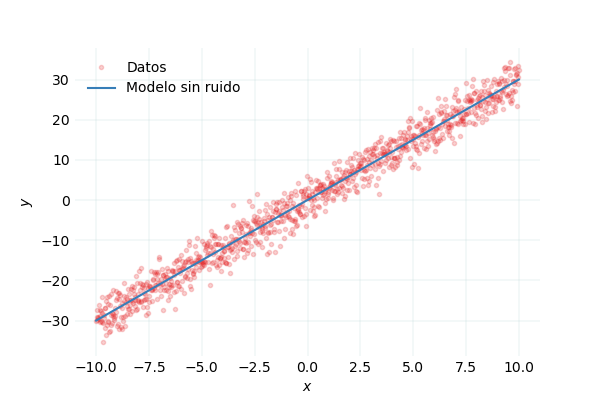

In [7]:
plt.figure()
plt.plot(X.numpy(), Y.numpy(), lw=0, marker=".", alpha=0.2)
plt.plot(X.numpy(), fun.numpy())
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(["Datos", "Modelo sin ruido"]);

## Modelo

Definamos un modelo lineal

In [8]:
def forward(x):
    return w * x

La función de pérdida es el error cuadrático medio

$$f(x; w) = |y - wx|^2 \, ,$$

In [9]:
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

In [10]:
w = torch.tensor(10.0, requires_grad=True)

Vamos a implementar el descenso del gradiente de forma manual
para este problema. En este caso, tenemos que los pesos
se pueden actualizar de la siguiente manera

$$w_{i + 1} = w_{i} - \lambda \nabla f(w_{i})\, ,$$

donde $\lambda$ es la tasa de aprendizaje.

In [11]:
step_size = 0.01
loss_list = []
niter = 20

In [12]:
for cont in range (niter):
    Y_pred = forward(X)
    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())
    loss.backward()
    w.data = w.data - step_size * w.grad.data
    w.grad.data.zero_()

    if cont % 1 == 0:
        print('{},\t{},\t{}'.format(cont, loss.item(), w.item()))

0,	1644.811279296875,	5.323883056640625
1,	188.53269958496094,	3.771419048309326
2,	28.01725196838379,	3.2560031414031982
3,	10.324740409851074,	3.084885597229004
4,	8.374615669250488,	3.0280749797821045
5,	8.159667015075684,	3.009213924407959
6,	8.135974884033203,	3.0029520988464355
7,	8.133363723754883,	3.00087308883667
8,	8.133075714111328,	3.000182867050171
9,	8.13304328918457,	2.9999537467956543
10,	8.133040428161621,	2.999877691268921
11,	8.133039474487305,	2.999852418899536
12,	8.133040428161621,	2.9998440742492676
13,	8.133040428161621,	2.9998412132263184
14,	8.133039474487305,	2.999840259552002
15,	8.133039474487305,	2.999840021133423
16,	8.133039474487305,	2.9998397827148438
17,	8.133040428161621,	2.9998397827148438
18,	8.133040428161621,	2.9998397827148438
19,	8.133040428161621,	2.9998397827148438


Grafiquemos la función de pérdida luego de cada iteración

Text(0, 0.5, 'Pérdida')

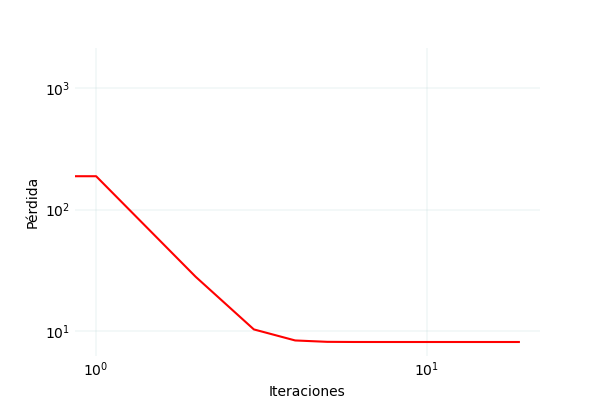

In [13]:
plt.figure()
plt.loglog(loss_list, 'r')
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")

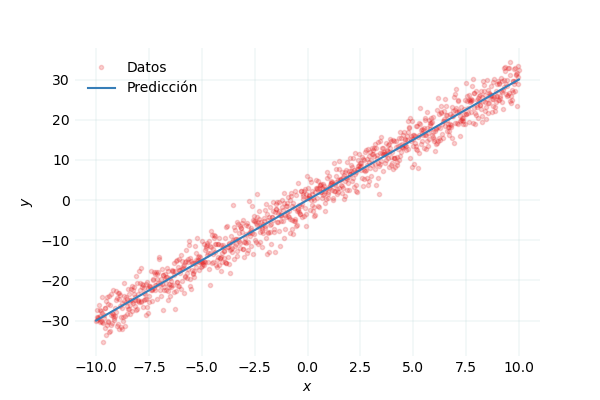

In [14]:
plt.figure()
plt.plot(X.numpy(), Y.numpy(), lw=0, marker=".", alpha=0.2)
plt.plot(X.numpy(), forward(X).detach().numpy())
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(["Datos", "Predicción"]);

In [15]:
w.grad.data

tensor(0.)

In [16]:
w.grad

tensor(0.)